# Numpy

## Creating Arrays from Python Lists

In [1]:
import numpy
numpy.__version__

'2.0.2'

In [2]:
import numpy as np

In [3]:
# To create an np array use np.array
# Optionally, the dtype keyword can be used to explicitly set the data type
np.array([1, 2, 3, 56], dtype=np.float32)

array([ 1.,  2.,  3., 56.], dtype=float32)

In [4]:
# np arrays can be multidimensional
for i in [2, 4, 6]:
    for a in range(i, i+3):
        print(a, end=' ')
    print()
# Nested lists result in multidimensional arrays
tmp = np.array([range(i, i + 3) for i in [2, 4, 6]])
tmp
# The inner lists are treated as rows in the resulting 2d array.

2 3 4 
4 5 6 
6 7 8 


array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [5]:
# Print the first row
# Expected [2, 3, 4]
print(tmp[0])
# Print the second row
# Expected [4, 5, 6]
print(tmp[1])
# Print the first column
# Expected [2, 4, 6]
print(tmp[:,0])
# Print the third column
# Expected [4, 6, 8]
print(tmp[:,2])

[2 3 4]
[4 5 6]
[2 4 6]
[4 6 8]


## Creating Arrays from Scratch

In [6]:
# Create a length 10 int array filled with 0s.
zeroes = np.zeros(10, dtype=int)

# Create a 3x5 floating-point array filled with 1s.
ones = np.ones((3,5), dtype=float)

# Create a 3x5 array filled with 3.14
pis = np.full((3,5), 3.14)

print(f"zeroes: \n{zeroes}")
print(f"ones: \n{ones}")
print(f"Pi s: \n{pis}")

zeroes: 
[0 0 0 0 0 0 0 0 0 0]
ones: 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Pi s: 
[[3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]]


In [7]:
# Alt zeroes
np.full((3,5), 0)
# Why would I use np.zeroes over np.full(,0)?
# The syntax loks simpler.

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [8]:
# Create an array filled with a linear sequence
# starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range function)
np.arange(0, 20, 2)
# Similiarly
#np.array(range(0,20, 2))

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [9]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)
# Create a 3x3 array of uniformly distributed
# pseudorandom values between 0 and 1
np.random.random((3, 3))
# Create a 3x3 array of normally distributed pseudorandom
# values with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))
# Create a 3x3 array of pseudorandom integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))
# Create an uninitialized array of three integers; the values will be
# whatever happens to already exist at that memory location
np.empty(3)

array([2.36675e-316, 0.00000e+000, 1.58101e-322])

### More on data types in Python Data Science Handook Chapter 2.01.

## The Basics of NumPy Arrays

### Numpy Array Atrributes

In [49]:
rng = np.random.default_rng(seed=1701)

x1 = rng.integers(10, size=6)
x2 = rng.integers(10, size=(3,4))
x3 = rng.integers(10, size=(3,4,5))

In [11]:
print("x3 ndim:  ", x3.ndim)
print("x3 shape: ", x3.shape)
print("x3 size:  ", x3.size)
print("x3 dtype: ", x3.dtype)

x3 ndim:   3
x3 shape:  (3, 4, 5)
x3 size:   60
x3 dtype:  int64


### Array Indexing: Accessing Single Elements

Indexing in NumPy will feel quite familiar. In a one-dimensional 
array, the value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists.

In [12]:
print(x1)
print(x1[0])
print("To index from the end of the array, you can use negative indices:")
print(x1[-1])

[9 4 0 3 8 6]
9
To index from the end of the array, you can use negative indices:
6


In a multidimensional array, items can be accessed using a comma-separated `(row, column)` tuple:

Values can also be modified using any of the preceding index notation:

In [13]:
print(x3)
print(x3[1])
print(x3[1][1])
print(x3[1][1][2])

[[[4 3 5 5 0]
  [8 3 5 2 2]
  [1 8 8 5 3]
  [0 0 8 5 8]]

 [[5 1 6 2 3]
  [1 2 5 6 2]
  [5 2 7 9 3]
  [5 6 0 2 0]]

 [[2 9 4 3 9]
  [9 2 2 4 0]
  [0 3 0 0 2]
  [3 2 7 4 7]]]
[[5 1 6 2 3]
 [1 2 5 6 2]
 [5 2 7 9 3]
 [5 6 0 2 0]]
[1 2 5 6 2]
5


### Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (`:`) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array `x`, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values `start=0`, `stop=<size of dimension>`, `step=1`.
Let's look at some examples of accessing subarrays in one dimension and in multiple dimensions.

#### One-Dimensional Subarrays

In [14]:
print(x1) # Array
print(x1[3:]) # first 3 elements
print(x1[1:5]) # middle sub array
print(x1[::2]) # Every second element
print(x1[1::2]) # Every second element starting at index 1
print(x1[::-1]) # All elements reversed
print(x1[4::-2])# Every second element from index 4 reversed.

[9 4 0 3 8 6]
[3 8 6]
[4 0 3 8]
[9 0 8]
[4 3 6]
[6 8 3 0 4 9]
[8 0 9]


#### Multidimensional Subarrays

In [15]:
#x2[0][0]=12
print(x2)
print(x2[:2, :3])# First two rows and three columns
print(x2[:3, ::2])# Three rows, every second column
print(x2[::-1, ::-1])# All rows and columns reversed

[[3 1 3 7]
 [4 0 2 3]
 [0 0 6 9]]
[[3 1 3]
 [4 0 2]]
[[3 3]
 [4 2]
 [0 6]]
[[9 6 0 0]
 [3 2 0 4]
 [7 3 1 3]]


In [16]:
print(x2[:,0]) # first column of x2
print(x2[0,:]) # first row of x2
print(x2[0])   # equivalent to x2[0, :]

[3 4 0]
[3 1 3 7]
[3 1 3 7]


#### Subarrays as No-Copy Views

Unlike Python list slices, NumPy array slices are returned as *views* rather than *copies* of the array data.
Consider our two-dimensional array from before:

In [17]:
print(x2)
x2_sub = x2[:2, :2]
print(x2_sub)
x2_sub[0, 0] = 99
print(x2_sub)
print(x2)

[[3 1 3 7]
 [4 0 2 3]
 [0 0 6 9]]
[[3 1]
 [4 0]]
[[99  1]
 [ 4  0]]
[[99  1  3  7]
 [ 4  0  2  3]
 [ 0  0  6  9]]


#### Creating Copies of Arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the `copy` method:

In [18]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)
print(x2)

[[99  1]
 [ 4  0]]
[[42  1]
 [ 4  0]]
[[99  1  3  7]
 [ 4  0  2  3]
 [ 0  0  6  9]]


### Reshaping of Arrays
Another useful type of operation is reshaping of arrays, which can be done with the `reshape` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [19]:
grid = np.arange(1, 10).reshape(3, 3)
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array, and in most cases the `reshape` method will return a no-copy view of the initial array.

A common reshaping operation is converting a one-dimensional array into a two-dimensional row or column matrix:

In [20]:
x = np.array([1, 2, 3])
x.reshape((1, 3))  # row vector via reshape

array([[1, 2, 3]])

In [21]:
x.reshape((3, 1))  # column vector via reshape

array([[1],
       [2],
       [3]])

In [22]:
x[np.newaxis, :]  # row vector via newaxis

array([[1, 2, 3]])

In [23]:
x[:, np.newaxis]  # column vector via newaxis

array([[1],
       [2],
       [3]])

### Array Concatentation and Splitting

#### Concatenation of Arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines `np.concatenate`, `np.vstack`, and `np.hstack`.
`np.concatenate` takes a tuple or list of arrays as its first argument, as you can see here:

In [24]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
print(np.concatenate([x, y]))
z = np.array([99, 99, 99])
print(np.concatenate([x, y, z]))

[1 2 3 3 2 1]
[ 1  2  3  3  2  1 99 99 99]


In [25]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
# concatenate along the first axis
print(np.concatenate([grid, grid]))
# concatenate along the second axis (zero-indexed)
print(np.concatenate([grid, grid], axis=1))
# concatenate along the second axis (zero-indexed)
print(np.concatenate([grid, grid], axis=0))

[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]


For working with arrays of mixed dimensions, it can be clearer to use the `np.vstack` (vertical stack) and `np.hstack` (horizontal stack) functions:

In [ ]:
# vertically stack the arrays
print(np.vstack([x, grid]))
# horizontally stack the arrays
y = np.array([[99],
              [99]])
print(np.hstack([grid, y]))

In [ ]:
# Similarly, for higher-dimensional arrays, `np.dstack` will stack arrays along the third axis.

#### Splitting of Arrays

The opposite of concatenation is splitting, which is implemented by the functions `np.split`, `np.hsplit`, and `np.vsplit`.  For each of these, we can pass a list of indices giving the split points:

In [ ]:
foo = [1, 2, 3, 99, 99, 3, 2, 1]
t, u, v = np.split(foo, [3, 5])
print(t, u, v)

In [ ]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)
left, right = np.hsplit(grid, [2])
print(left)
print(right)

## 02.03 Computation on NumPy Arrays: Universal Functions

Up until now, we have been discussing some of the basic nuts and bolts of NumPy. In the next few chapters, we will dive into the reasons that NumPy is so important in the Python data science world: namely, because it provides an easy and flexible interface to optimize computation with arrays of data.

Computation on NumPy arrays can be very fast, or it can be very slow.
The key to making it fast is to use vectorized operations, generally implemented through NumPy's *universal functions* (ufuncs).
This chapter motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient.
It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

## 02.04 Aggregations: min, max, and Everything in Between

A first step in exploring any dataset is often to compute various summary statistics.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregations are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and try out some of them here.

## 02.05 Computation on Arrays: Broadcasting

The set of rules by which Numpy let's you apply binary operations such as addition and subtraction between arrays of different sizes and shapes.


In [ ]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
print(a + b)
print(a+5)

We can think of this as an operation that stretches or duplicates the value `5` into the array `[5, 5, 5]`, and adds the results.

In [ ]:
M = np.ones((3, 3),dtype="int32")
print(M)
print(M + a)

In [ ]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)
a + b

### Rules of Broadcasting

    Rule 1 - If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

    Rule 2 - If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

    Rule 3 - If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [ ]:
M = np.ones((2,3))
print(M)
a = np.arange(3)
print("\n", a)
print(f"The shape of M is: {M.shape}.")
print(f"The shape of a is: {a.shape}.")
# Rule 1
print(f"The shape of M+a is: {(M + a).shape}.")

In [ ]:
a = a.reshape((3,1))
b = np.arange(3)
print(a)
print(f"The shape of b is: {b.shape}.")
print(f"The shape of a is: {a.shape}.")
# Rule 1
print(f"The shape of b+a is: {(b + a).shape}.")

#### An In-Depth look into Broadcasting

##### Shape Compatibility Rules

    1. If x,y have a different number of dimensions, prepend 1s to the shape of the shorter.

    2. Any axis of length 1 can be repeated (broadcast) to the length of the other vector's length in that axis.

    3. All other axes must have matching lengths.

The above rules are used to compute whether arrays are compatible and, if so, the broadcasted shape. They are also a restatement of the Rules of Broadcasting.

Once shapes match, use for loop to understand:

In [27]:
#import numpy as np

x_example = np.array([[0,1,2],[3,4,5],[6,7,8]]) #shape (3,3)
y_example = np.array([1, 10, 100]).reshape(3,1) # shape (3,1)

print(x_example+y_example)

[[  1   2   3]
 [ 13  14  15]
 [106 107 108]]


In [ ]:
# NOT what happens under the hood, but a way to conceptualize:
# align
# x_example        (3,3)
# y_example        (3,1)
shape = (3,3)
out = np.empty(shape, dtype=int)
N0, N1 = shape
for i in range(N0):
    for j in range(N1):
        out[i,j] = x[i,j] + y[i,0]

In [29]:
x_example = np.array([[[0,1,2],[3,4,5],[6,7,8]],[[9,10,11],[12,13,14],[15,16,17]]])
# shape (2, 3, 3)
y_example = np.array([1,10,100]) # shape (3)

print(x_example + y_example)

# align and prepend
# x_example        (2,3,3)
# y_example        (1,1,3)
shape = (2,3,3)
out = np.empty(shape, dtype=int)
N0, N1, N2 = shape
for i in range(N0):
    for j in range(N1):
        for k in range(N2):
            # leave off prepended indicies
            out[i,j, k] = x_example[i,j,k] + y_example[k]

print(out)

[[[  1  11 102]
  [  4  14 105]
  [  7  17 108]]

 [[ 10  20 111]
  [ 13  23 114]
  [ 16  26 117]]]
[[[  1  11 102]
  [  4  14 105]
  [  7  17 108]]

 [[ 10  20 111]
  [ 13  23 114]
  [ 16  26 117]]]


In [31]:
x_example = np.array([[0],[1],[2]]) # shape (3, 1)
y_example = np.array([[3,4,5]]) # shape (1, 3)

print(x_example + y_example)

# align and prepend
# x_example        (3,1)
# y_example        (1,3)
shape = (3,3)
out = np.empty(shape, dtype=int)
N0, N1= shape
for i in range(N0):
    for j in range(N1):
        # leave off prepended indicies
        out[i,j] = x_example[i,0] + y_example[0,j]

print(out)

[[3 4 5]
 [4 5 6]
 [5 6 7]]
[[3 4 5]
 [4 5 6]
 [5 6 7]]


### Centering an Array

In [32]:
rng = np.random.default_rng(seed=1701)
X = rng.random((10, 3))

In [33]:
Xmean = X.mean(0)
Xmean

array([0.38503638, 0.36991443, 0.63896043])

In [34]:
X_centered = X - Xmean

In [35]:
X_centered.mean(0)

array([ 4.99600361e-17, -4.44089210e-17,  0.00000000e+00])

### Plotting a Two-Dimensional Function

In [36]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

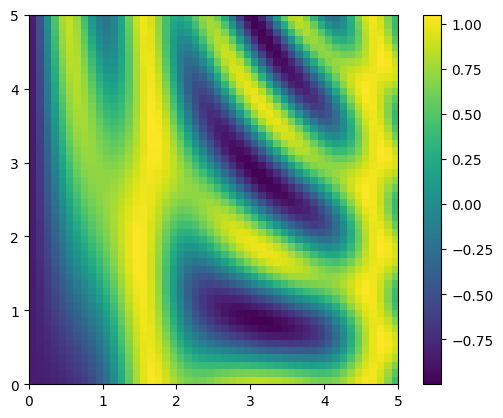

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5])
plt.colorbar();

## 02.06 Comparisons, Masks, and Boolean Logic

This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays.
Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or remove all outliers that are above some threshold.
In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.


### Example: Counting Rainy Days

In [27]:
from vega_datasets import data

# Use DataFrame operations to extract rainfall as a NumPy array
rainfall_mm = np.array(
    data.seattle_weather().set_index('date')['precipitation']['2015'])
len(rainfall_mm)

365

### Comparison Operators as Ufuncs



In [10]:
x = np.array([1, 2, 3, 4, 5])
print("x < 3 \n", x < 3)   # less than
print(f"np.less(x,3)\n{np.less(x,3)}") # Equivalent to previous line
print("...And for equality,")
print(f"x < 3 == np.less(x,3) {np.equal(x<3,np.less(x,3)).all()}")
print("x >= 3 \n", x >= 3)   # less than

x < 3 
 [ True  True False False False]
np.less(x,3)
[ True  True False False False]
...And for equality,
x < 3 == np.less(x,3) True
x >= 3 
 [False False  True  True  True]


In [12]:
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3,4))
print(x)
print(f"x<6\n{np.less(x,6)}")

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]
x<6
[[False  True  True  True]
 [False False  True  True]
 [ True False  True  True]]


### Working with Boolean Arrays
#### Counting Entries
Counting number of True entries

In [14]:
# how many values are less than 6?
print(f"np.count_nonzero(x<6)\n{np.count_nonzero(x<6)}")
print(f"np.count_nonzero(np.less(x,6))\n{np.count_nonzero(np.less(x,6))}")

np.count_nonzero(x<6)
8
np.count_nonzero(np.less(x,6))
8


In the above, True evaluates to 1, and False evaluates to 0.
Ex:

In [15]:
np.sum(x<6)

np.int64(8)

In [24]:
# are there any values greater than 8?
print(np.any(x > 8))
# are there any values less than zero?
print(np.any(x < 0))
# are all values less than 10?
print(np.all(x < 10))
# are all values equal to 6?
print(np.all(x == 6))
# are all values in each row less than 8?
print(np.all(x < 8, axis=1)) # This output is not as I expected
print(np.all(x[0,:] < 8, axis=0)) # This is my expected output. How is my understanding flawed?

True
False
True
False
False


#### Boolean Operators



In [28]:
print("Number days without rain:  ", np.sum(rainfall_mm == 0))
print("Number days with rain:     ", np.sum(rainfall_mm != 0))
print("Days with more than 10 mm: ", np.sum(rainfall_mm > 10))
print("Rainy days with < 5 mm:    ", np.sum((rainfall_mm > 0) &
                                            (rainfall_mm < 5)))

Number days without rain:   221
Number days with rain:      144
Days with more than 10 mm:  34
Rainy days with < 5 mm:     83


### Boolean Arrays as Masks

In the preceding section we looked at aggregates computed directly on Boolean arrays.
A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves.

In [26]:
# An array of all values in the array that are less than 5.
print(f"x<5\n{x<5}")
# To select these values from the array, index into it.
print(f"x[x<5]\n{x[x<5]}")

x<5
[[False  True  True  True]
 [False False  True  True]
 [ True False  True  True]]
x[x<5]
[4 0 3 3 1 3 4 0]


In [30]:
# construct a mask of all rainy days
rainy = (rainfall_mm > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2015 (mm):   ",
      np.median(rainfall_mm[rainy]))
print("Median precip on summer days in 2015 (mm):  ",
      np.median(rainfall_mm[summer]))
print("Maximum precip on summer days in 2015 (mm): ",
      np.max(rainfall_mm[summer]))
print("Median precip on non-summer rainy days (mm):",
      np.median(rainfall_mm[rainy & ~summer]))

Median precip on rainy days in 2015 (mm):    3.8
Median precip on summer days in 2015 (mm):   0.0
Maximum precip on summer days in 2015 (mm):  32.5
Median precip on non-summer rainy days (mm): 4.1


### Using the Keywords and/or Versus the Operators &/|

The difference is this: `and` and `or` operate on the object as a whole, while `&` and `|` operate on the elements within the object.

## 02.07 Fancy Indexing

### Exploring Fancy Indexing

Fancy indexing is passing an array of indicies to access multiple array elements at once.

In [53]:
rng = np.random.default_rng(seed=1701)
x=rng.integers(100, size = 10)
print(x)
# To get specific elements by index, one could...
print(x[3], x[7], x[2])
print("equivalantly")
ind = [3,7,2]
print(x[ind])
ind = np.array([[3, 7],
                [4, 5]])
print("In this case, the shape of the index is returned, not the shape of the\n\t original array.")
print(x[ind])


[90 40  9 30 80 67 39 15 33 79]
30 15 9
equivalantly
[30 15  9]
In this case, the shape of the index is returned, not the shape of the
	 original array.
[[30 15]
 [80 67]]


In [38]:
X = np.arange(12).reshape((3, 4)) # This is CAPITAL X
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row, col]

array([ 2,  5, 11])

In [40]:
# Broadcasting rules apply
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

### Combined Indexing

In [42]:
# Fancy and simple indexing
print("Fancy and simple indexing")
print(X[2, [2, 0, 1]])
# Fancy and slicing
print("Fancy and slicing")
print(X[1:, [2, 0, 1]])
# Fancy and masking
print("Fancy and masking")
mask = np.array([True, False, True, False])
print(X[row[:, np.newaxis], mask])

Fancy and simple indexing
[10  8  9]
Fancy and slicing
[[ 6  4  5]
 [10  8  9]]
Fancy and masking
[[ 0  2]
 [ 4  6]
 [ 8 10]]


### Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix.
For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [54]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rng.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

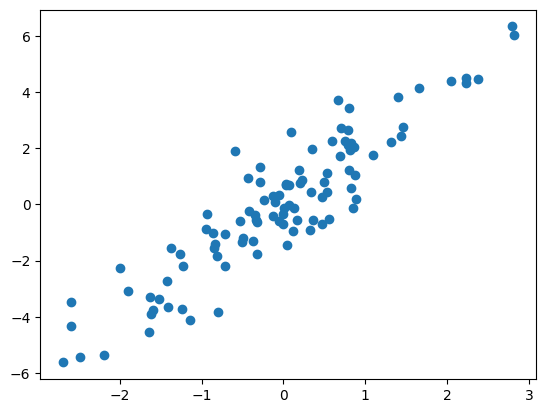

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')#This line doesn't work due to different styles available

plt.scatter(X[:, 0], X[:, 1]);

In [55]:
# Use fancy indexing to select 20 random points, non-repeating
indices = np.random.choice(X.shape[0], 20, replace=False)
print(indices, "\n")

# Use indices as a mask.

selection = X[indices]
print(selection.shape)

[32 98 89  9 41 62 54 53 38 44 60 92 13 68 79 48 31 75 81 80] 

(20, 2)


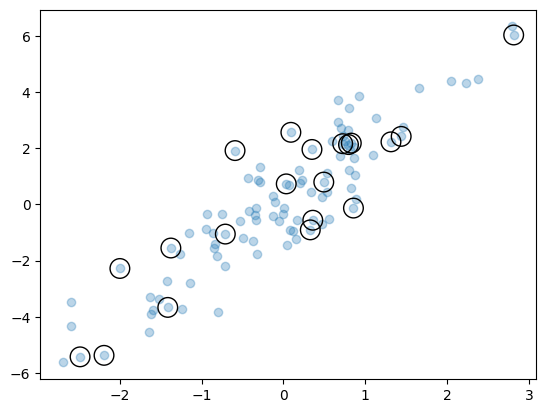

In [56]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', edgecolor='black', s=200);

This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models, and in sampling approaches to answering statistical questions.

### Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array.

In [58]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)
x[i] -= 10
print(x)

[ 0 99 99  3 99  5  6  7 99  9]
[ 0 89 89  3 89  5  6  7 89  9]


In [59]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)
# x[0] becomes 4, then x[0] becomes 6.

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [60]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x
#The assignment happens multiple times, not the augment.
# For the augmenting behavior, use at

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [61]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


### Example: Binning Data


In [62]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

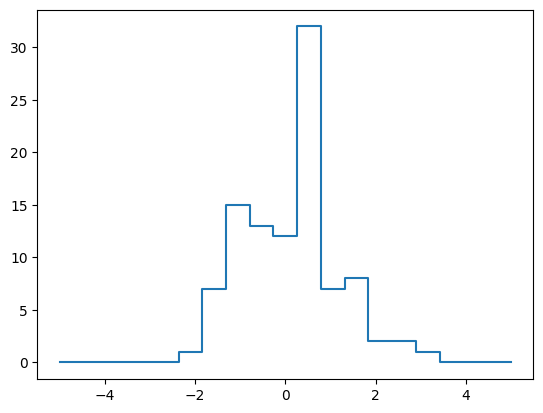

In [63]:
# plot the results
plt.plot(bins, counts, drawstyle='steps');

## 02.08 Sorting Arrays

Up to this point we have been concerned mainly with tools to access and operate on array data with NumPy.
This chapter covers algorithms related to sorting values in NumPy arrays.
These algorithms are a favorite topic in introductory computer science courses: if you've ever taken one, you probably have had dreams (or, depending on your temperament, nightmares) about *insertion sorts*, *selection sorts*, *merge sorts*, *quick sorts*, *bubble sorts*, and many, many more.
All are means of accomplishing a similar task: sorting the values in a list or array.

Python has a couple of built-in functions and methods for sorting lists and other iterable objects. The `sorted` function accepts a list and returns a sorted version of it:

### Fast Sorting in NumPy: np.sort and np.argsort

The `np.sort` function is analogous to Python's built-in `sorted` function, and will efficiently return a sorted copy of an array.

A related function is `argsort`, which instead returns the *indices* of the sorted elements:


In [64]:
x = np.array([2, 1, 4, 3, 5])
print(x[np.argsort(x)])

[1 2 3 4 5]


#### Sorting Along Rows or Columns

In [65]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4, 6))
print(X)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [66]:
# sort each column of X
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [67]:
# sort each row of X
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

### Partial Sorts: Partitioning

`np.partition` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition and the remaining values to the right.

In [68]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Notice that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.
Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [69]:
np.partition(X, 2, axis=1)

array([[0, 4, 4, 7, 6, 8],
       [0, 0, 2, 6, 5, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [70]:
X = rng.random((10, 2))
print(X)

[[0.64386512 0.82276161]
 [0.4434142  0.22723872]
 [0.55458479 0.06381726]
 [0.82763117 0.6316644 ]
 [0.75808774 0.35452597]
 [0.97069802 0.89312112]
 [0.7783835  0.19463871]
 [0.466721   0.04380377]
 [0.15428949 0.68304895]
 [0.74476216 0.96750973]]


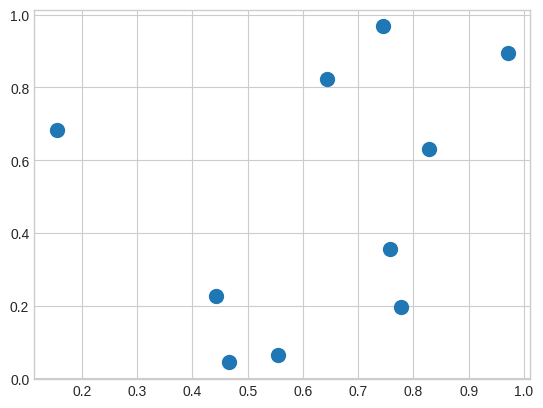

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(X[:, 0], X[:, 1], s=100);

Now we'll compute the distance between each pair of points.
Recall that the squared distance between two points is the sum of the squared differences in each dimension;
using the efficient broadcasting and aggregation routines provided by NumPy we can compute the matrix of square distances in a single line of code:

In [72]:
dist_sq = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1)

In [73]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


In [74]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

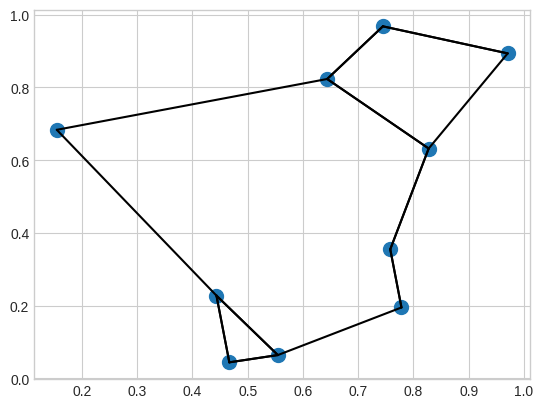

In [75]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

## Structured Data: NumPy's Structured Arrays

In [76]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [77]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [78]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [79]:
# Stop here...
# Skpping on to Pandas.

# Rando notes

In [ ]:
np.arange(5)

In [ ]:
np.arange(1,6)

In [ ]:
np.linspace(0, np.pi, 3)

In [ ]:
np.linspace(0, np.pi)


In [ ]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)


In [ ]:
print(data)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')